<a href="https://colab.research.google.com/github/gjduart/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Exercicio KNN</h1>

<h3 align="center">March 16, 2020</h3>

<h3>Alunos :<p>Gabriel Jonas da Silva Duarte<br \>
    Mayanna Rodrigues</p>


<h2>1°Questão</h2>

<h3>Realizando importações</h3>

In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h3>Carregando datasets</h3>

In [ ]:
names = ['x1','x2','classes']
df = pd.read_csv("dados-ex1-1.csv",names=names) 
tmp = df.values
tensordf = torch.from_numpy(tmp)

<h3>Inserindo dados de train e da classe</h3> 

In [ ]:
train = tensordf[:,:2]
classe = tensordf[:,2]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


<h3>Criando uma distribuição uniforme</h3>

In [ ]:
import torch.distributions.uniform as dist
d = dist.Uniform(-1*torch.ones(1000),torch.ones(1000))  #distribuição uniforme de -1 a 1
a = dist.Uniform(-1*torch.ones(1000),torch.ones(1000))  #distribuição uniforme de -1 a 1

test_entries = d.sample()
test_entries2 = a.sample()

In [ ]:
def plot(x,y,k):
    for i in range(k):
        if(knn.predict([[x[i],y[i]]]) == 1):
            plt.scatter(x[i],y[i], marker='o', c='red')
        else:
            plt.scatter(x[i],y[i], marker='o', c='black')
  

<h3>Grafico</h3>

	 	 Para k= 1


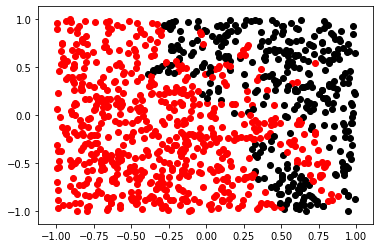

	 	 Para k= 3


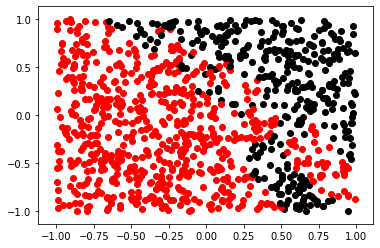

	 	 Para k= 9


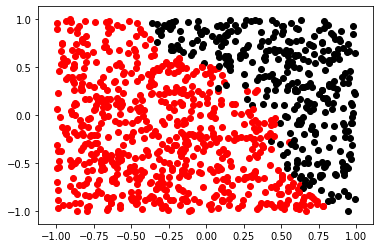

	 	 Para k= 27


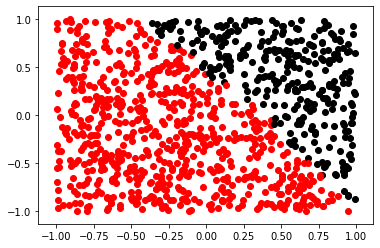

In [ ]:
neighbors=[1,3,9,27]
for i in range(len(neighbors)):
    knn = KNeighborsClassifier(n_neighbors=neighbors[i])
    knn.fit(train,classe)
    print('\t \t Para k=',neighbors[i])
    plot(test_entries,test_entries2,1000)
    plt.show()

<h2>Conclusão</h2>

<p>Quanto maior o número de vizinhos(K) os postos se tronam mais heterogênios. Pesando de formar lógica e observando o que foi plotado nos gráficos podemos perceber que apartir do memento em que se aumenta o número de vizinhos existe um maior probabilidade de o ponto avaliado ser classificado de forma erra.  </p>

<h2>2° questão</h2>

In [ ]:
import torch.distributions.uniform as dist

distbase = dist.Uniform(-1*torch.ones(1),torch.ones(1))#distribuição uniforme de -1 a 1
conjunto1 = distbase.sample((4, ))
conjunto2 = distbase.sample((10, ))
conjunto3 = distbase.sample((100, ))

<h3>Criando uma função para calcular a função matematica</h3>

\begin{align}
\dot{f(x)} & = 2x^2sin(15x) \quad com \qquad x\in [-1,1]
\end{align}

In [ ]:
def generateDataset(tensor):
    out = 2*torch.pow(tensor,2)*torch.sin(15*tensor)
    return out

<h3>Aplicando as entradas a função e criando dataset</h3>

<h4>Gerando os Datasets quer irão na classe para N = 4,10,100.</h4>

In [ ]:
y_treino =  generateDataset(conjunto1) #ytreino
y2_treino = generateDataset(conjunto2)
y3_treino = generateDataset(conjunto3)


<h4>Inserindo o gerando o conjunto teste no intervalo [-1,1]</h4>

In [ ]:
distTeste = dist.Uniform(-1*torch.ones(1),torch.ones(1))
teste = distTeste.sample((1000, ))


<h3>Importando e treinando o algoritmo para regressão para 
     K = 1 e N = 4</h3>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN1_4 = KNeighborsRegressor(n_neighbors=1)# KNN_N4 (KNN1 = Knn com 1 vizinho e N = 4)
KNN1_4.fit(conjunto1,y_treino.view(-1,1))

KNN1_10 = KNeighborsRegressor(n_neighbors=1) #KNN_10 (KNN com 1 vizinho e N = 10)
KNN1_10.fit(conjunto2,y2_treino.view(-1,1))

KNN1_100 = KNeighborsRegressor(n_neighbors=1) #KNN_100 (KNN com 1 vizinho e N = 100)
KNN1_100.fit(conjunto3,y3_treino.view(-1,1))


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [ ]:
preds1 = KNN1_4.predict(teste.view(-1, 1))
preds2 = KNN1_10.predict(teste.view(-1, 1))
preds3 = KNN1_100.predict(teste.view(-1, 1))

<h4>Calculo do Mean Squared Error, para predicoes no conjunto de treinamento e no conjunto de teste</h4>
\begin{equation*}
\mathcal{L} =\frac{1}{N}\sum_{k=1}^{N} (y_n-\hat{y}_n)^2
\end{equation*}

In [ ]:
#Por enquanto so no de testes
from sklearn.metrics import mean_squared_error 
errorTeste1 = mean_squared_error(generateDataset(teste), preds1)
errorTeste2 = mean_squared_error(generateDataset(teste), preds2)
errorTeste3 = mean_squared_error(generateDataset(teste), preds3)

print("Erro para N = 4:", errorTeste1)
print("Erro para N = 10:", errorTeste2)
print("Erro para N = 100:", errorTeste3)

Erro para N = 4: 0.99692637
Erro para N = 10: 0.5896996
Erro para N = 100: 0.020614529


Text(0.5, 1.0, 'Grafico para K = 1')

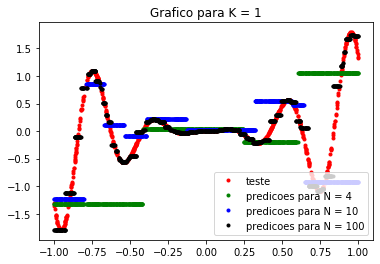

In [ ]:
plt.plot(teste, generateDataset(teste), '.r',label = 'teste')
plt.plot(teste, preds1, '.g' , label='predicoes para N = 4')
plt.plot(teste, preds2, '.b' , label='predicoes para N = 10')
plt.plot(teste, preds3, '.' , color='black', label='predicoes para N = 100')
plt.legend(loc='lower right')

plt.title("Grafico para K = 1")

<h2>A seguir faremos, o plot para K=3, 5 e N=4, 10, 100</h2>

 <h3> Para  K = 3 </h3>

In [ ]:
KNN2_4 = KNeighborsRegressor(n_neighbors=3)# KNN_N4 (KNN1 = Knn com 1 vizinho e N = 4)
KNN2_4.fit(conjunto1,y_treino.view(-1,1))

KNN2_10 = KNeighborsRegressor(n_neighbors=3) #KNN_10 (KNN com 1 vizinho e N = 10)
KNN2_10.fit(conjunto2,y2_treino.view(-1,1))

KNN2_100 = KNeighborsRegressor(n_neighbors=3) #KNN_100 (KNN com 1 vizinho e N = 100)
KNN2_100.fit(conjunto3,y3_treino.view(-1,1))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

<h4>Realizando as Predicoes </h4>

In [ ]:
preds1 = KNN2_4.predict(teste.view(-1, 1))
preds2 = KNN2_10.predict(teste.view(-1, 1))
preds3 = KNN2_100.predict(teste.view(-1, 1))

<h4>Calculo do erro e plotagem</h4>

Erro para N = 4: 0.5788156
Erro para N = 10: 0.54297924
Erro para N = 100: 0.038162764


Text(0.5, 1.0, 'Grafico para K = 3')

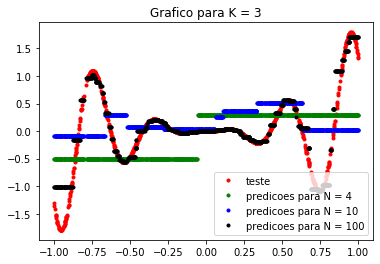

In [ ]:
errorTeste1 = mean_squared_error(generateDataset(teste), preds1)
errorTeste2 = mean_squared_error(generateDataset(teste), preds2)
errorTeste3 = mean_squared_error(generateDataset(teste), preds3)

print("Erro para N = 4:", errorTeste1)
print("Erro para N = 10:", errorTeste2)
print("Erro para N = 100:", errorTeste3)

plt.plot(teste, generateDataset(teste), '.r',label = 'teste')
plt.plot(teste, preds1, '.g' , label='predicoes para N = 4')
plt.plot(teste, preds2, '.b' , label='predicoes para N = 10')
plt.plot(teste, preds3, '.' , color='black', label='predicoes para N = 100')
plt.legend(loc='lower right')

plt.title("Grafico para K = 3")

<h3>Para K=5</h3>

In [ ]:
KNN3_10 = KNeighborsRegressor(n_neighbors=5) #KNN_10 (KNN com 1 vizinho e N = 10)
KNN3_10.fit(conjunto2,y2_treino.view(-1,1))

KNN3_100 = KNeighborsRegressor(n_neighbors=5) #KNN_100 (KNN com 1 vizinho e N = 100)
KNN3_100.fit(conjunto3,y3_treino.view(-1,1))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

<h4>Realizando as Predicoes </h4>

In [ ]:
preds2 = KNN3_10.predict(teste.view(-1, 1))
preds3 = KNN3_100.predict(teste.view(-1, 1))

<h4>Calculo do erro e plotagem</h4>

Erro para N = 10: 0.50266457
Erro para N = 100: 0.12706585


Text(0.5, 1.0, 'Grafico para K = 5')

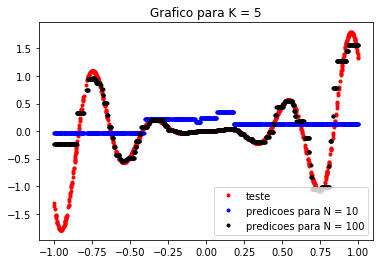

In [ ]:
errorTeste1 = mean_squared_error(generateDataset(teste), preds1)
errorTeste2 = mean_squared_error(generateDataset(teste), preds2)
errorTeste3 = mean_squared_error(generateDataset(teste), preds3)


print("Erro para N = 10:", errorTeste2)
print("Erro para N = 100:", errorTeste3)

plt.plot(teste, generateDataset(teste), '.r',label = 'teste')
plt.plot(teste, preds2, '.b' , label='predicoes para N = 10')
plt.plot(teste, preds3, '.' , color='black', label='predicoes para N = 100')
plt.legend(loc='lower right')

plt.title("Grafico para K = 5")

<p> Observando as representações graficas podemos perceber que quanto maior a amostra de treinamento mais aproximado fica o 
grafico da função. Além disso, quanto maior for o número de vizinhos menor seráo erre quadrático gerado pela função.</p>   